## 0. Introduction
In this section of the notebook, we take some initial steps to get started:
* Import necessary libraries
* Import the data
* Take a look at the overview of the data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import math
from itertools import chain

In [2]:
# Set the path to the datasets
ios_path = "/Users/rubenb/Library/Mobile Documents/com~apple~CloudDocs/1. Data Science/9. Datasets/1. Kobe Bryant Shots"
windows_path = "C:\\Users\\Rubil\\iCloudDrive\\1. Data Science\\9. Datasets\\1. Kobe Bryant Shots"

In [3]:
# Set operating system
op_sys = "Windows"

In [4]:
# Import the train and test datasets
if op_sys == "iOS":
    train = pd.read_csv(ios_path+"/data.csv")
    y_test = pd.read_csv(ios_path+"/sample_submission.csv")
elif op_sys == "Windows":
    train = pd.read_csv(windows_path+"\data.csv")
    y_test = pd.read_csv(windows_path+"\sample_submission.csv")

In [5]:
# Investigate the shape of the training data set
train.shape

(30697, 25)

In [6]:
# Investigate the shape of the test data set
y_test.shape

(5000, 2)

In [7]:
# Take a look at the top 5 rows of the train dataset
train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [8]:
# Take a look at the top 5 rows of the test dataset
y_test.head()

,shot_id,shot_made_flag
0,1,0.5
1,8,0.5
2,17,0.5
3,20,0.5
4,33,0.5


In [9]:
# Take a look at the datatypes of the training dataset
train.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [10]:
# Take a look at the datatypes of the test dataset
y_test.dtypes

shot_id             int64
shot_made_flag    float64
dtype: object

In [11]:
# Extract features for test dataset
x_test = train[train["shot_made_flag"].isna()].drop("shot_made_flag", axis = 1).reset_index(drop=True)

In [12]:
# Remove test features from training dataset
train = train[train["shot_made_flag"].notna()].reset_index(drop=True)

# 1. Univariate data analysis
In this section of the notebook we analyze each individual variable of the training dataset, to understand the data we're working with, and to identify any problematic data points.

### 1.1. Action Type

In [13]:
train[train["action_type"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [14]:
train.action_type.value_counts()

Jump Shot                          15836
Layup Shot                          2154
Driving Layup Shot                  1628
Turnaround Jump Shot                 891
Fadeaway Jump Shot                   872
Running Jump Shot                    779
Pullup Jump shot                     402
Turnaround Fadeaway shot             366
Slam Dunk Shot                       334
Reverse Layup Shot                   333
Jump Bank Shot                       289
Driving Dunk Shot                    257
Dunk Shot                            217
Tip Shot                             151
Step Back Jump shot                  106
Alley Oop Dunk Shot                   95
Floating Jump shot                    93
Driving Reverse Layup Shot            83
Hook Shot                             73
Driving Finger Roll Shot              68
Alley Oop Layup shot                  67
Reverse Dunk Shot                     61
Driving Finger Roll Layup Shot        59
Turnaround Bank shot                  58
Running Layup Sh

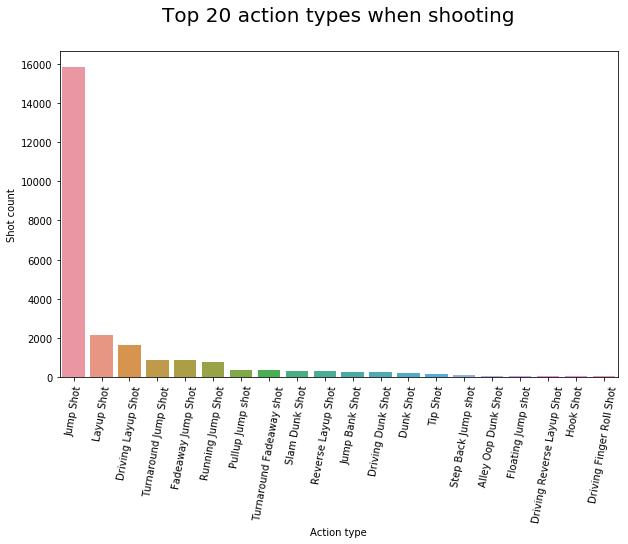

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.action_type, order = train.action_type.value_counts().iloc[:20].index)
plt.xticks(rotation=80)
plt.title("Top 20 action types when shooting", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Action type")
plt.ylabel("Shot count")
plt.show()

### 1.2. Combined Shot Type

In [16]:
train[train["combined_shot_type"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [17]:
train.combined_shot_type.value_counts()

Jump Shot    19710
Layup         4532
Dunk          1056
Tip Shot       152
Hook Shot      127
Bank Shot      120
Name: combined_shot_type, dtype: int64

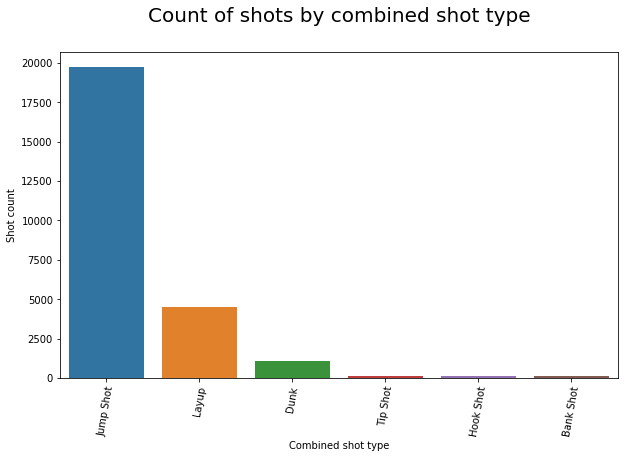

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.combined_shot_type, order = train.combined_shot_type.value_counts().index)
plt.xticks(rotation=80)
plt.title("Count of shots by combined shot type", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Combined shot type")
plt.ylabel("Shot count")
plt.show()

### 1.3. Game Event ID

In [19]:
train[train["game_event_id"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [20]:
train.game_event_id.value_counts().value_counts(bins = 5)

(42.6, 63.4]     294
(21.8, 42.6]     144
(0.895, 21.8]    117
(63.4, 84.2]      61
(84.2, 105.0]      2
Name: game_event_id, dtype: int64

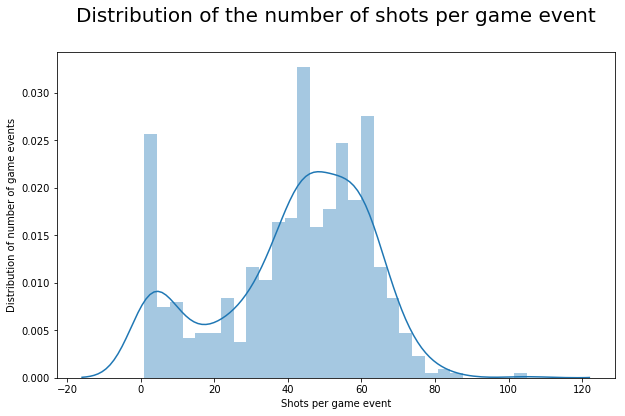

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.game_event_id.value_counts().values, bins = 30)
plt.title("Distribution of the number of shots per game event", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots per game event")
plt.ylabel("Distribution of number of game events")
plt.show()

### 1.4. Game ID

In [22]:
train[train["game_id"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [23]:
train.game_id.value_counts().value_counts(bins = 5)

(9.4, 17.8]     659
(17.8, 26.2]    612
(0.957, 9.4]    208
(26.2, 34.6]     69
(34.6, 43.0]     10
Name: game_id, dtype: int64

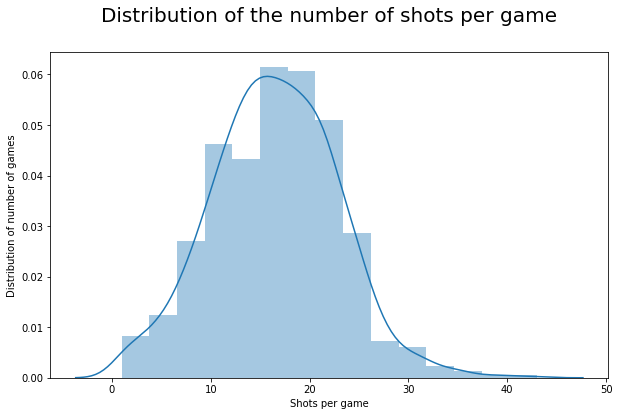

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.game_id.value_counts().values, bins = 15)
plt.title("Distribution of the number of shots per game", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots per game")
plt.ylabel("Distribution of number of games")
plt.show()

### 1.5. Latitude

In [25]:
train[train["lat"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [26]:
train.lat.describe()

count    25697.000000
mean        33.953043
std          0.088152
min         33.253300
25%         33.884300
50%         33.970300
75%         34.040300
max         34.088300
Name: lat, dtype: float64

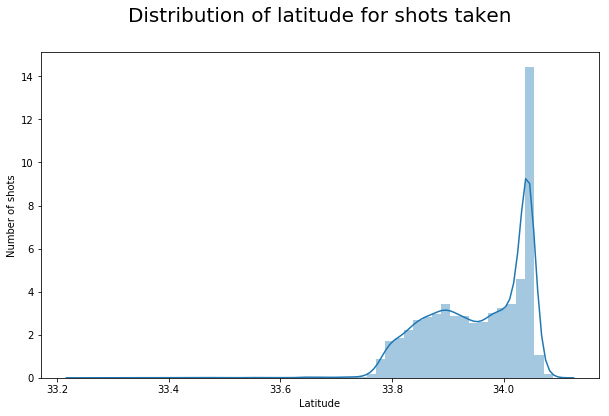

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.lat)
plt.title("Distribution of latitude for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Latitude")
plt.ylabel("Number of shots")
plt.show()

### 1.6. X Coordinate Location

In [28]:
train[train["loc_x"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [29]:
train.loc_x.describe()

count    25697.000000
mean         7.148422
std        110.073147
min       -250.000000
25%        -67.000000
50%          0.000000
75%         94.000000
max        248.000000
Name: loc_x, dtype: float64

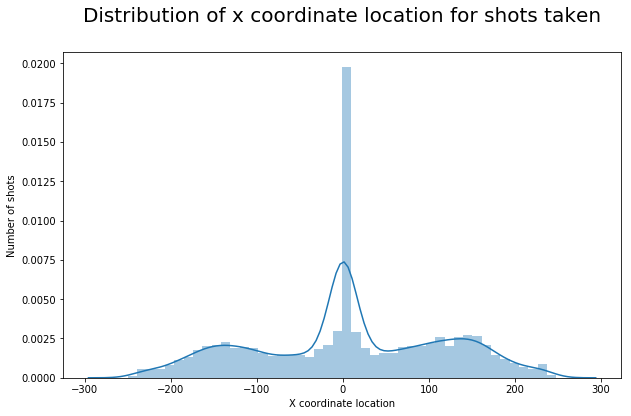

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.loc_x)
plt.title("Distribution of x coordinate location for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("X coordinate location")
plt.ylabel("Number of shots")
plt.show()

### 1.7. Y Coordinate Location

In [31]:
train[train["loc_y"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [32]:
train.loc_y.describe()

count    25697.000000
mean        91.257345
std         88.152106
min        -44.000000
25%          4.000000
50%         74.000000
75%        160.000000
max        791.000000
Name: loc_y, dtype: float64

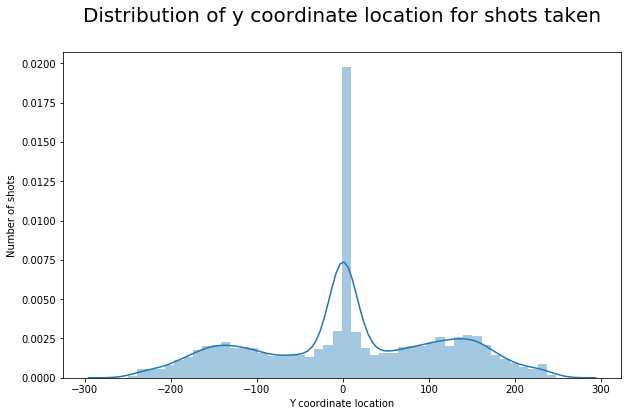

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.loc_x)
plt.title("Distribution of y coordinate location for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Y coordinate location")
plt.ylabel("Number of shots")
plt.show()

### 1.8. Longitude

In [34]:
train[train["lon"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [35]:
train.lon.describe()

count    25697.000000
mean      -118.262652
std          0.110073
min       -118.519800
25%       -118.336800
50%       -118.269800
75%       -118.175800
max       -118.021800
Name: lon, dtype: float64

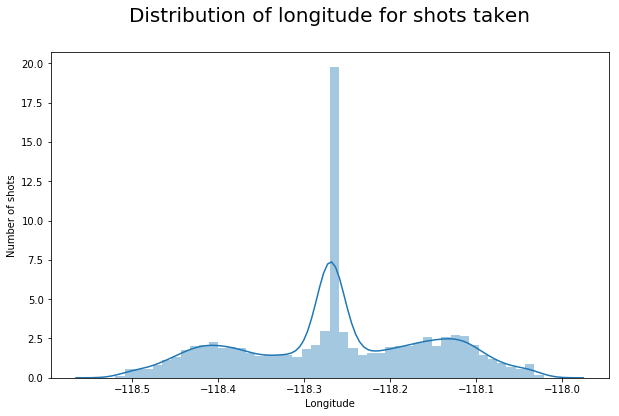

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.lon)
plt.title("Distribution of longitude for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Longitude")
plt.ylabel("Number of shots")
plt.show()

### 1.9. Minutes Remaining

In [37]:
train[train["minutes_remaining"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [38]:
train.minutes_remaining.describe()

count    25697.000000
mean         4.886796
std          3.452475
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: minutes_remaining, dtype: float64

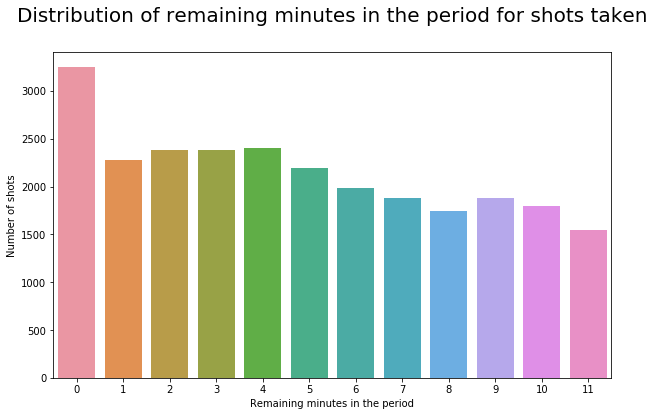

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.minutes_remaining)
plt.title("Distribution of remaining minutes in the period for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Remaining minutes in the period")
plt.ylabel("Number of shots")
plt.show()

### 1.10. Period

In [40]:
train[train["period"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [41]:
train.period.value_counts()

3    7002
1    6700
4    6043
2    5635
5     280
6      30
7       7
Name: period, dtype: int64

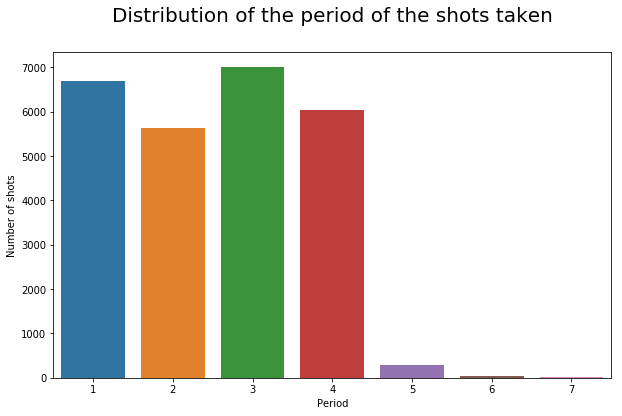

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.period)
plt.title("Distribution of the period of the shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Period")
plt.ylabel("Number of shots")
plt.show()

### 1.11. Playoffs

In [43]:
train[train["playoffs"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [44]:
train.playoffs.value_counts()

0    21939
1     3758
Name: playoffs, dtype: int64

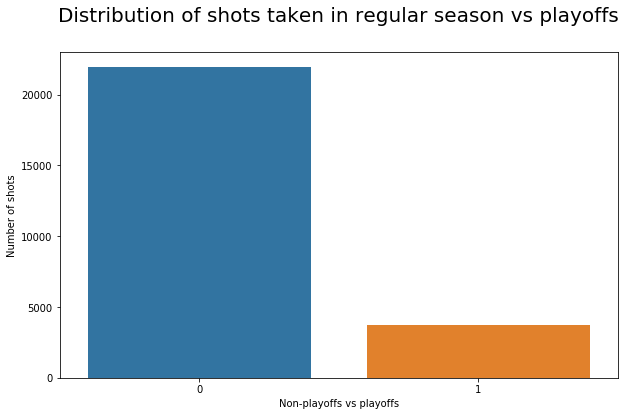

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.playoffs)
plt.title("Distribution of shots taken in regular season vs playoffs", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Non-playoffs vs playoffs")
plt.ylabel("Number of shots")
plt.show()

### 1.12. Season

In [46]:
train[train["season"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [47]:
train.season.value_counts()

2005-06    1924
2002-03    1852
2008-09    1851
2007-08    1819
2009-10    1772
2001-02    1708
2006-07    1579
2000-01    1575
2010-11    1521
2011-12    1416
2003-04    1371
2012-13    1328
1999-00    1312
2004-05    1127
2015-16     932
1997-98     810
1998-99     765
2014-15     593
1996-97     383
2013-14      59
Name: season, dtype: int64

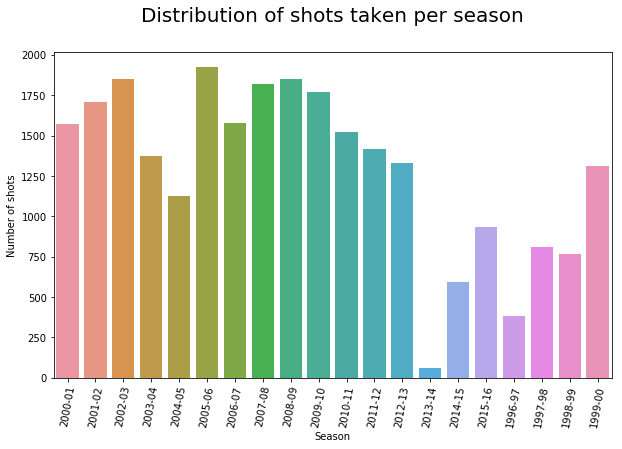

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.season)
plt.title("Distribution of shots taken per season", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Season")
plt.ylabel("Number of shots")
plt.show()

### 1.13. Seconds remaining

In [49]:
train[train["seconds_remaining"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [50]:
train.seconds_remaining.describe()

count    25697.000000
mean        28.311554
std         17.523392
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64

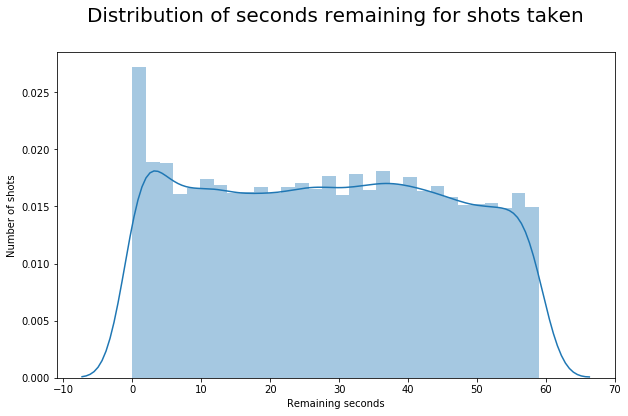

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.seconds_remaining, bins = 30)
plt.title("Distribution of seconds remaining for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Remaining seconds")
plt.ylabel("Number of shots")
plt.show()

### 1.14. Shot distance

In [52]:
train[train["shot_distance"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [53]:
train.shot_distance.describe()

count    25697.000000
mean        13.457096
std          9.388725
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

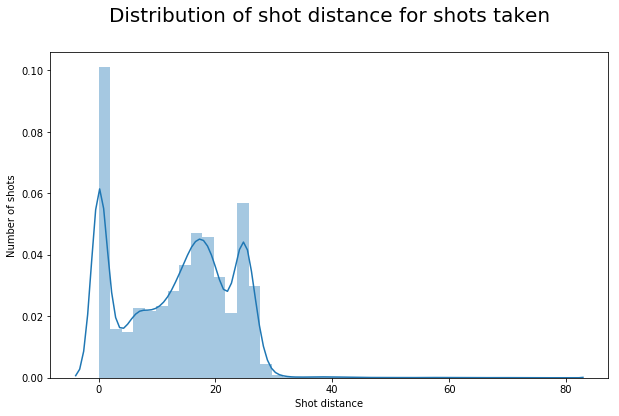

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.shot_distance, bins = 40)
plt.title("Distribution of shot distance for shots taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot distance")
plt.ylabel("Number of shots")
plt.show()

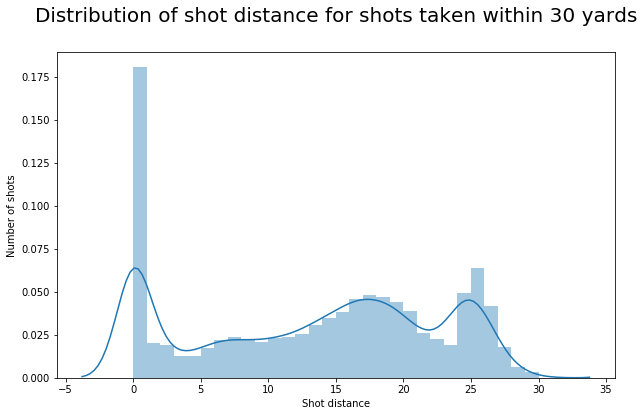

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train[train["shot_distance"] <= 30].shot_distance, bins = 30)
plt.title("Distribution of shot distance for shots taken within 30 yards", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot distance")
plt.ylabel("Number of shots")
plt.show()

### 1.15. Shot Made

In [56]:
train[train["shot_made_flag"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [57]:
train.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

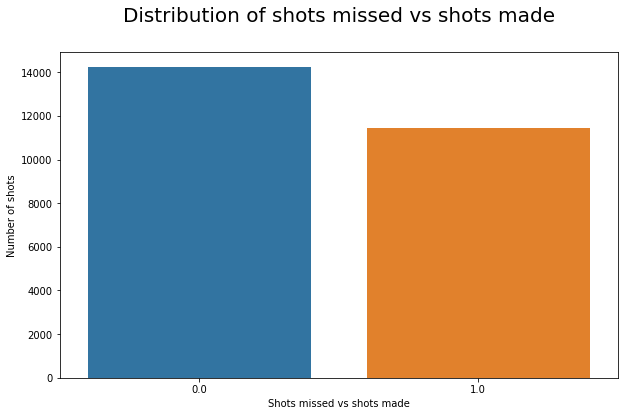

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.shot_made_flag)
plt.title("Distribution of shots missed vs shots made", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots missed vs shots made")
plt.ylabel("Number of shots")
plt.show()

### 1.16. Shot type

In [59]:
train[train["shot_type"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [60]:
train.shot_type.value_counts()

2PT Field Goal    20285
3PT Field Goal     5412
Name: shot_type, dtype: int64

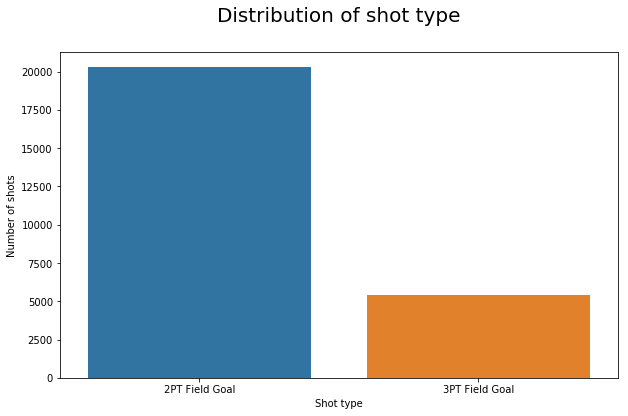

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.shot_type)
plt.title("Distribution of shot type", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot type")
plt.ylabel("Number of shots")
plt.show()

### 1.17. Shot zone area

In [62]:
train[train["shot_zone_area"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [63]:
train.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

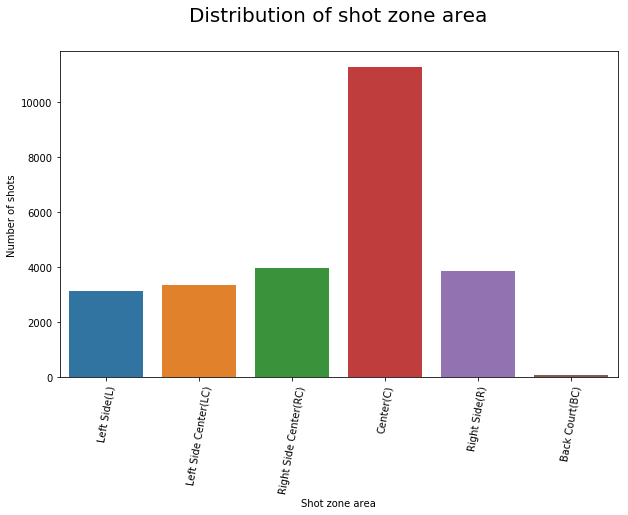

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.shot_zone_area)
plt.title("Distribution of shot zone area", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Shot zone area")
plt.ylabel("Number of shots")
plt.show()

### 1.18. Shot zone basic

In [65]:
train[train["shot_zone_basic"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [66]:
train.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

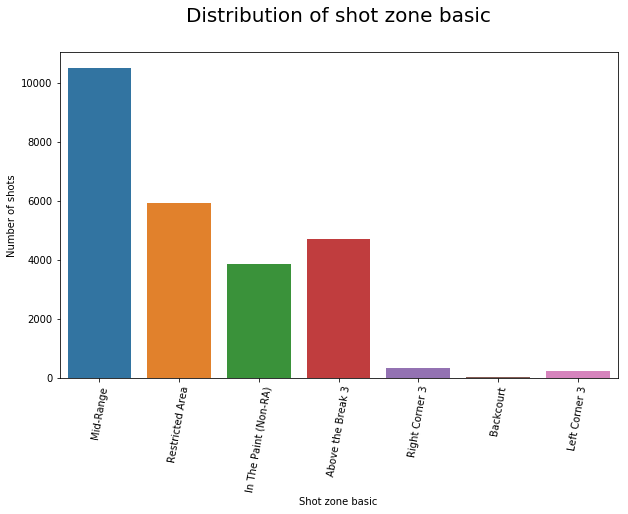

In [67]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.shot_zone_basic)
plt.title("Distribution of shot zone basic", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Shot zone basic")
plt.ylabel("Number of shots")
plt.show()

### 1.19. Shot zone range

In [68]:
train[train["shot_zone_range"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [69]:
train.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

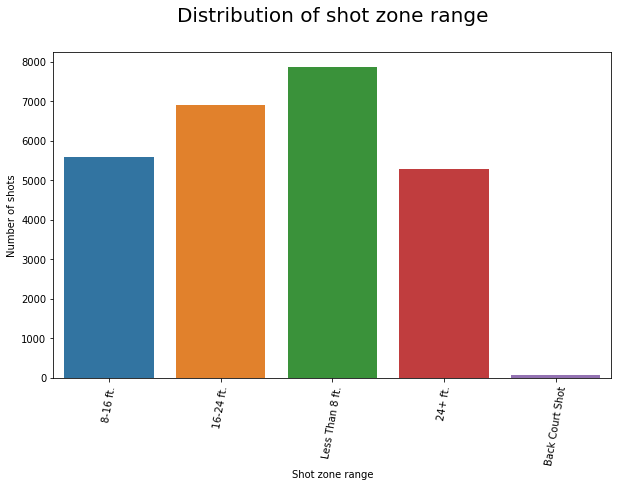

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.shot_zone_range)
plt.title("Distribution of shot zone range", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Shot zone range")
plt.ylabel("Number of shots")
plt.show()

### 1.20. Team ID

In [71]:
train[train["team_id"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [72]:
train.team_id.value_counts()

1610612747    25697
Name: team_id, dtype: int64

### 1.21. Team Name

In [73]:
train[train["team_name"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [74]:
train.team_name.value_counts()

Los Angeles Lakers    25697
Name: team_name, dtype: int64

### 1.22. Game Date

In [75]:
train[train["game_date"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [76]:
train.game_date.value_counts().head()

2016-04-13    43
2007-03-30    41
2006-01-22    39
2002-11-07    39
2008-01-14    37
Name: game_date, dtype: int64

In [77]:
train.game_date = [dt.strptime(x, "%Y-%m-%d") for x in train.game_date]

In [78]:
train.game_date.describe()

count                   25697
unique                   1558
top       2016-04-13 00:00:00
freq                       43
first     1996-11-03 00:00:00
last      2016-04-13 00:00:00
Name: game_date, dtype: object

### 1.23. Matchup

In [79]:
train[train["matchup"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [80]:
train.matchup.value_counts()

LAL @ SAS      853
LAL vs. SAS    765
LAL @ SAC      751
LAL @ PHX      751
LAL vs. HOU    722
LAL vs. PHX    721
LAL @ DEN      712
LAL @ HOU      677
LAL @ POR      676
LAL vs. SAC    646
LAL vs. DEN    640
LAL @ UTA      617
LAL vs. POR    616
LAL @ MIN      615
LAL vs. UTA    606
LAL vs. MIN    604
LAL @ GSW      585
LAL vs. GSW    558
LAL vs. LAC    548
LAL @ DAL      534
LAL @ LAC      526
LAL vs. DAL    499
LAL vs. MEM    444
LAL @ BOS      432
LAL @ MEM      427
LAL @ SEA      366
LAL vs. BOS    351
LAL vs. IND    348
LAL @ ORL      347
LAL vs. SEA    328
              ... 
LAL @ CHI      261
LAL vs. MIL    260
LAL vs. ORL    257
LAL vs. CHI    255
LAL @ ATL      249
LAL @ MIL      247
LAL @ MIA      239
LAL vs. CLE    238
LAL vs. NOH    238
LAL @ NOH      237
LAL @ NJN      225
LAL vs. WAS    224
LAL vs. NJN    197
LAL vs. ATL    189
LAL vs. CHA    188
LAL @ CHA      177
LAL @ NOK      108
LAL @ VAN      107
LAL vs. VAN     97
LAL vs. NOK     88
LAL vs. CHH     81
LAL @ NOP   

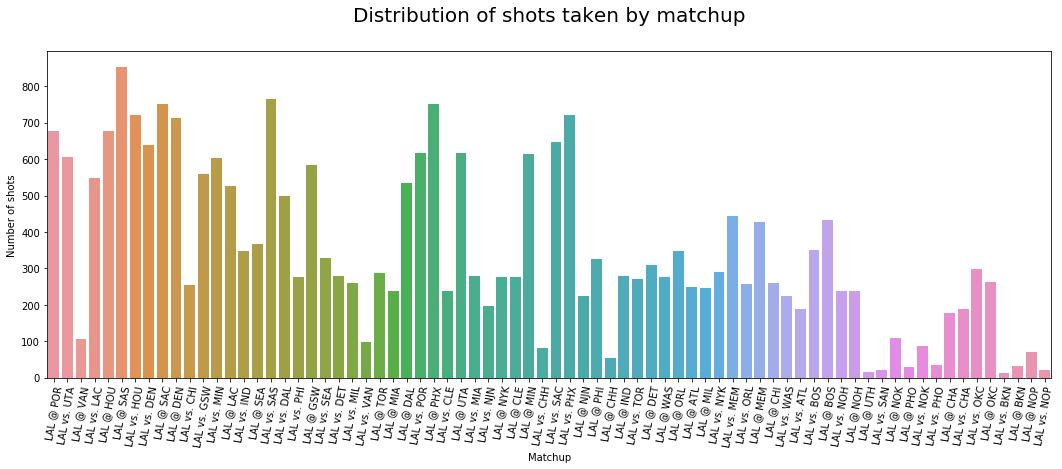

In [81]:
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(train.matchup)
plt.title("Distribution of shots taken by matchup", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Matchup")
plt.ylabel("Number of shots")
plt.show()

### 1.24. Opponent

In [82]:
train[train["opponent"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [83]:
train.opponent.value_counts()

SAS    1638
PHX    1535
HOU    1399
SAC    1397
DEN    1352
POR    1292
UTA    1238
MIN    1219
GSW    1143
LAC    1074
DAL    1033
MEM     871
BOS     783
SEA     694
IND     626
ORL     604
PHI     603
DET     587
NYK     566
OKC     561
TOR     556
MIA     517
CHI     516
CLE     514
MIL     507
WAS     501
CHA     500
NOH     475
ATL     438
NJN     422
NOP     287
VAN     204
BKN      45
Name: opponent, dtype: int64

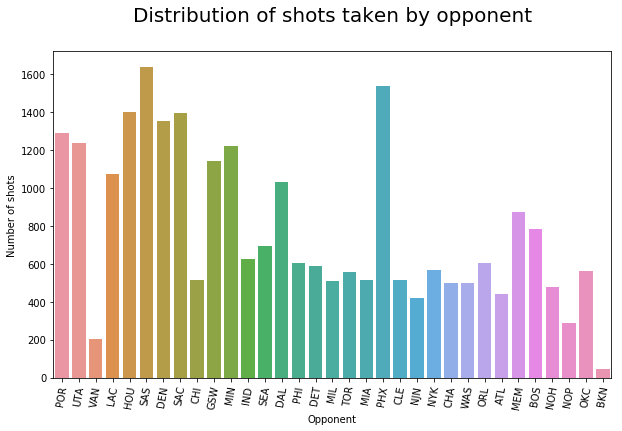

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.opponent)
plt.title("Distribution of shots taken by opponent", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Opponent")
plt.ylabel("Number of shots")
plt.show()

### 1.25. Shot ID

In [85]:
train[train["shot_id"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [86]:
train.shot_id.value_counts().head()

6141     1
30052    1
5448     1
7497     1
1354     1
Name: shot_id, dtype: int64

## 2. Data wrangling and feature engineering
### 2.1. Calculate seconds remaining in period

In [87]:
def calc_seconds_in_period(df):
    df["seconds_in_period"] = [(df.minutes_remaining.loc[x] * 60 + df.seconds_remaining.loc[x]) for x in df.index]
    return df

In [88]:
train = calc_seconds_in_period(train)

In [89]:
train[train["seconds_in_period"].isna()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,seconds_in_period


In [90]:
train.seconds_in_period.describe()

count    25697.000000
mean       321.519321
std        208.311076
min          0.000000
25%        141.000000
50%        304.000000
75%        499.000000
max        714.000000
Name: seconds_in_period, dtype: float64

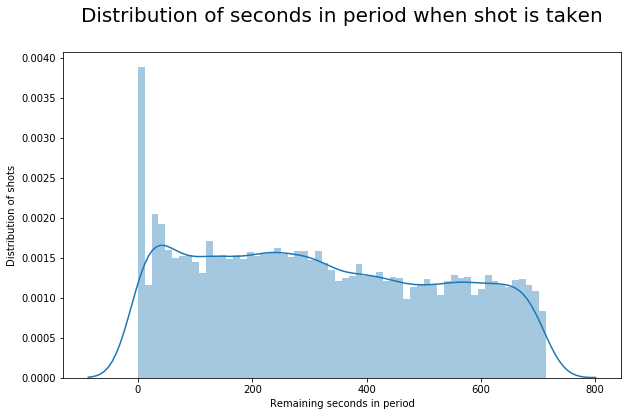

In [91]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.seconds_in_period, bins = 60)
plt.title("Distribution of seconds in period when shot is taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Remaining seconds in period")
plt.ylabel("Distribution of shots")
plt.show()

### 2.2. Calculate remaining seconds until the end of regulation

In [92]:
def calc_seconds_in_regulation(df):
    df["overtime_secs"] = -1 * ((df.period - 4) * 720 - df.seconds_in_period)
    df["secs_in_reg2"] = df.seconds_in_period + (720 * (df.period-1))
    df["seconds_in_regulation"] = np.where(df['period'] <= 4, df['secs_in_reg2'], df['overtime_secs'])
    
    df.drop(["overtime_secs","secs_in_reg2"], axis = 1, inplace = True)
    
    return df

In [93]:
train = calc_seconds_in_regulation(train)

In [94]:
train.seconds_in_regulation.describe()

count    25697.000000
mean      1369.619878
std        855.934731
min      -2146.000000
25%        644.000000
50%       1442.000000
75%       2112.000000
max       2872.000000
Name: seconds_in_regulation, dtype: float64

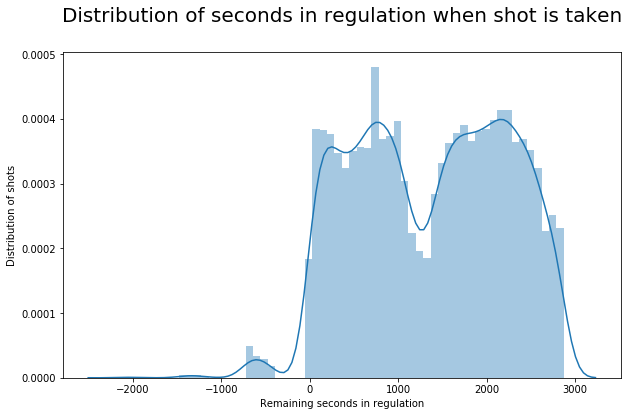

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.seconds_in_regulation, bins = 60)
plt.title("Distribution of seconds in regulation when shot is taken", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Remaining seconds in regulation")
plt.ylabel("Distribution of shots")
plt.show()

### 2.3. Reformat season to numeric

In [96]:
def season_to_numeric(df):
    df["num_season"] = df.season.str[:4].astype(int)
    return df

In [97]:
train = season_to_numeric(train)

In [98]:
train.num_season.value_counts()

2005    1924
2002    1852
2008    1851
2007    1819
2009    1772
2001    1708
2006    1579
2000    1575
2010    1521
2011    1416
2003    1371
2012    1328
1999    1312
2004    1127
2015     932
1997     810
1998     765
2014     593
1996     383
2013      59
Name: num_season, dtype: int64

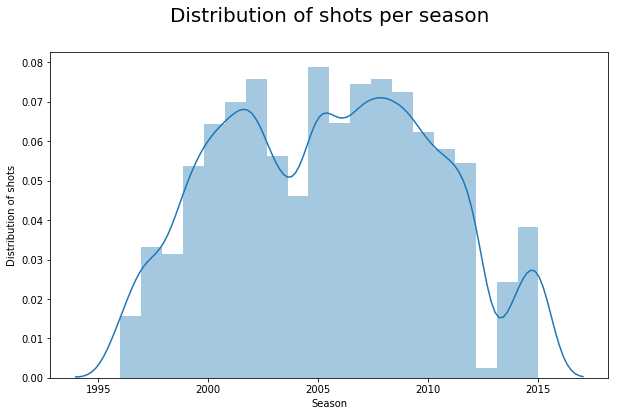

In [99]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.num_season, bins = 20)
plt.title("Distribution of shots per season", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Season")
plt.ylabel("Distribution of shots")
plt.show()

### 2.4. Determine home field advantage

In [100]:
train["home_game"] = train["matchup"].str.contains("vs.").astype(int)

In [101]:
train.home_game.value_counts()

0    13212
1    12485
Name: home_game, dtype: int64

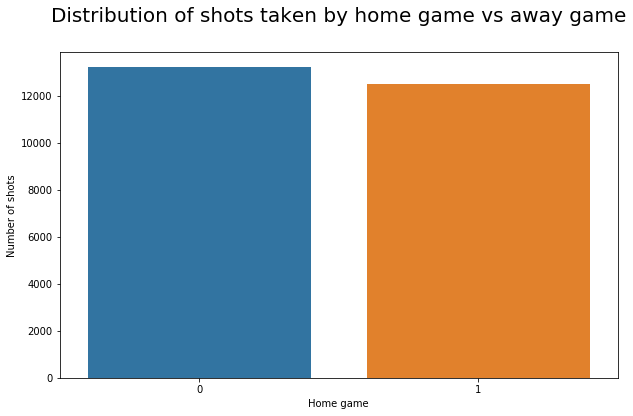

In [102]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.home_game)
plt.title("Distribution of shots taken by home game vs away game", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Home game")
plt.ylabel("Number of shots")
plt.show()

### 2.5. Drop variables that don't add value

In [103]:
to_drop = ["season","team_id","team_name","matchup"]

In [104]:
train.drop(to_drop, axis = 1, inplace = True)

### 2.6. Extract month, day, days into season and Kobe Bryant age out of Game Date variable

In [105]:
train["month"] = pd.DatetimeIndex(train.game_date).month

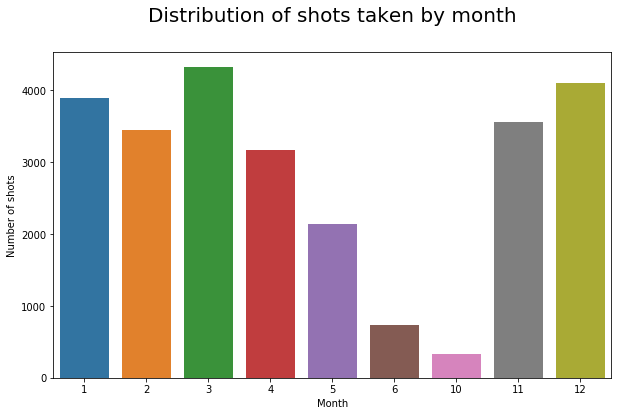

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.month)
plt.title("Distribution of shots taken by month", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Month")
plt.ylabel("Number of shots")
plt.show()

In [107]:
train["day"] = pd.DatetimeIndex(train.game_date).weekday

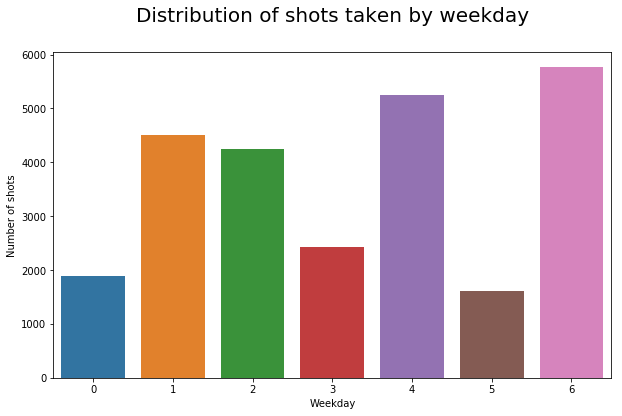

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.day)
plt.title("Distribution of shots taken by weekday", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Weekday")
plt.ylabel("Number of shots")
plt.show()

In [109]:
kb_bday = dt.strptime("08-23-1978", "%m-%d-%Y")

In [110]:
train["kb_age"] = train["game_date"] - dt.strptime("08-23-1978", "%m-%d-%Y")

In [111]:
train["kb_age_days"] = [date.days for date in train["kb_age"]]

In [112]:
train["kb_age_years"] = [math.floor(x/365.4) for x in train["kb_age_days"]]

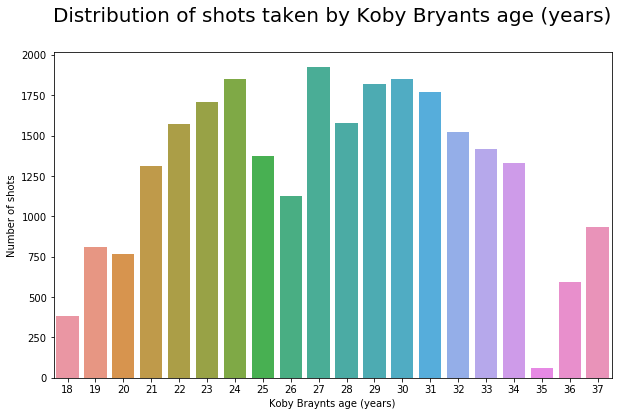

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(train.kb_age_years)
plt.title("Distribution of shots taken by Koby Bryants age (years)", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Koby Braynts age (years)")
plt.ylabel("Number of shots")
plt.show()

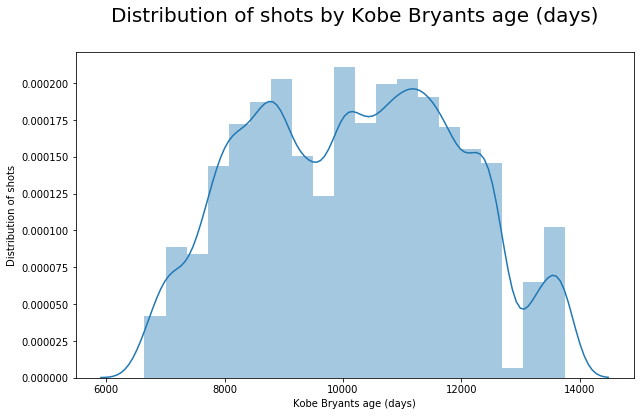

In [114]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.kb_age_days, bins = 20)
plt.title("Distribution of shots by Kobe Bryants age (days)", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Kobe Bryants age (days)")
plt.ylabel("Distribution of shots")
plt.show()

In [115]:
min_date_season = train.groupby(["num_season"])["game_date"].min()

In [116]:
min_date_season.loc[1996]

Timestamp('1996-11-03 00:00:00')

In [117]:
min_date_season.index

Int64Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='num_season')

In [118]:
days_into_season = []
for i in min_date_season.index:
    days_into_season.append([x - min_date_season.loc[i] for x in train[train["num_season"] == i].game_date])
days_into_season = list(chain.from_iterable(days_into_season))

train["days_into_season"] = [x.days for x in days_into_season]

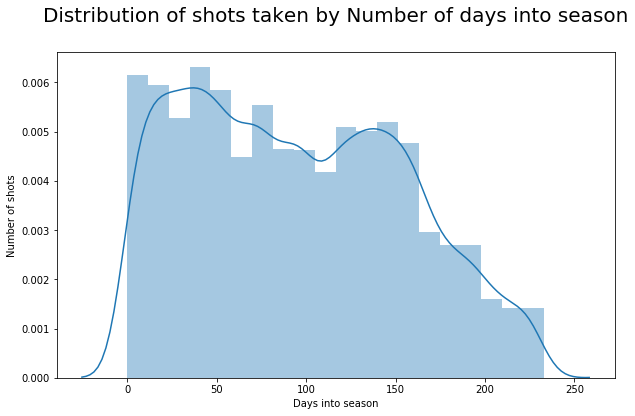

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(train.days_into_season, bins = 20)
plt.title("Distribution of shots taken by Number of days into season", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Days into season")
plt.ylabel("Number of shots")
plt.show()

In [120]:
train.drop("kb_age", axis = 1, inplace = True)

## 3. Bivariate analysis

In [121]:
from scipy import stats

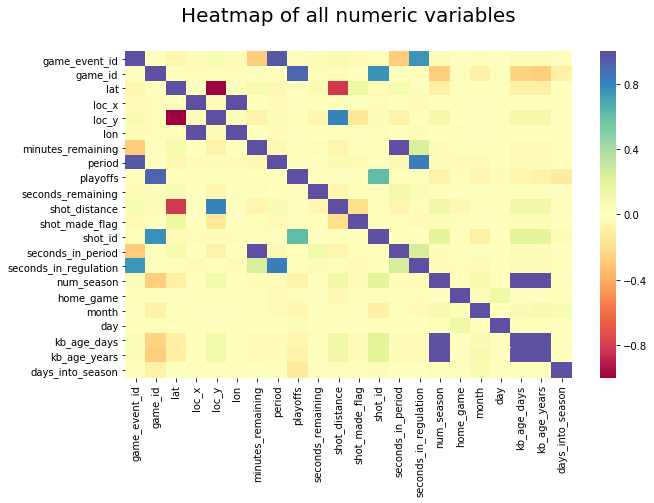

In [122]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(train.drop(["action_type","combined_shot_type","shot_type","shot_zone_area","shot_zone_basic","shot_zone_range","opponent","game_date"], axis = 1).corr(), cmap = 'Spectral', center = 0)
plt.title("Heatmap of all numeric variables", fontdict = {"fontsize":20}, pad=30.0)
plt.show()

### 3.1. Shots made by Action type

In [123]:
def compare_means(df, var, cat):
    cat_average = df[df[var] == cat].shot_made_flag.mean()
    non_cat_average = df[df[var] != cat].shot_made_flag.mean()
    
    x = len(df[(df[var] == cat) & (df["shot_made_flag"] == 1)])
    n = len(df[df[var] == cat])
    p = df.shot_made_flag.mean()

    p_value = stats.binom_test(x = x, n = n, p = p)
    
    print("Kobe Bryant made " + str(round(cat_average*100,2)) + "% of his shots if the " + var + " is " + str(cat) + ".")
    print("Kobe Bryant made " + str(round(non_cat_average*100,2)) + "% of his shots if the " + var + " is not " + str(cat) + ".")
    print("There is a " + str(round(p_value*100,2)) + "% chance that the difference in these means is a coincidence.")

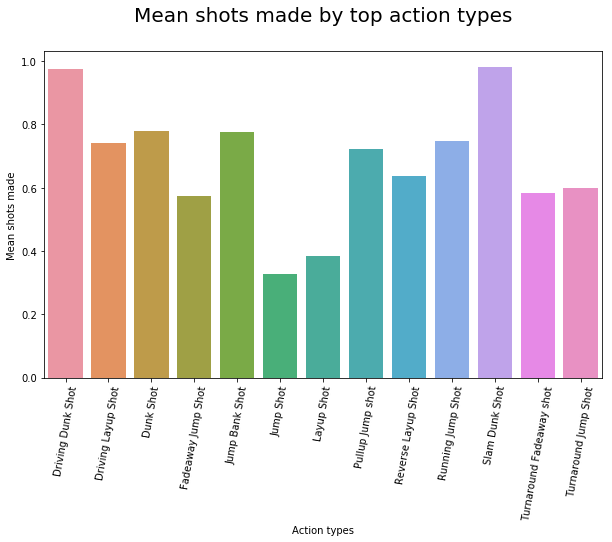

In [124]:
mean_made_by_action_type = train.groupby("action_type")["shot_made_flag"].agg(["sum","mean"]).reset_index()
mean_made_by_action_type = mean_made_by_action_type[mean_made_by_action_type["sum"] >= 100]
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_action_type["action_type"], y = mean_made_by_action_type["mean"])
plt.title("Mean shots made by top action types", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation = 80)
plt.xlabel("Action types")
plt.ylabel("Mean shots made")
plt.show()

In [125]:
compare_means(train, "action_type", "Jump Shot")

Kobe Bryant made 32.69% of his shots if the action_type is Jump Shot.
Kobe Bryant made 63.77% of his shots if the action_type is not Jump Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [126]:
compare_means(train, "action_type", "Layup Shot")

Kobe Bryant made 38.53% of his shots if the action_type is Layup Shot.
Kobe Bryant made 45.17% of his shots if the action_type is not Layup Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [127]:
compare_means(train, "action_type", "Driving Layup Shot")

Kobe Bryant made 74.14% of his shots if the action_type is Driving Layup Shot.
Kobe Bryant made 42.62% of his shots if the action_type is not Driving Layup Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [128]:
compare_means(train, "action_type", "Turnaround Jump Shot")

Kobe Bryant made 59.82% of his shots if the action_type is Turnaround Jump Shot.
Kobe Bryant made 44.07% of his shots if the action_type is not Turnaround Jump Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [129]:
compare_means(train, "action_type", "Fadeaway Jump Shot")

Kobe Bryant made 57.45% of his shots if the action_type is Fadeaway Jump Shot.
Kobe Bryant made 44.17% of his shots if the action_type is not Fadeaway Jump Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [130]:
compare_means(train, "action_type", "Running Jump Shot")

Kobe Bryant made 74.71% of his shots if the action_type is Running Jump Shot.
Kobe Bryant made 43.68% of his shots if the action_type is not Running Jump Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [131]:
compare_means(train, "action_type", "Pullup Jump shot")

Kobe Bryant made 72.39% of his shots if the action_type is Pullup Jump shot.
Kobe Bryant made 44.17% of his shots if the action_type is not Pullup Jump shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [132]:
compare_means(train, "action_type", "Turnaround Fadeaway shot")

Kobe Bryant made 58.47% of his shots if the action_type is Turnaround Fadeaway shot.
Kobe Bryant made 44.42% of his shots if the action_type is not Turnaround Fadeaway shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [133]:
compare_means(train, "action_type", "Slam Dunk Shot")

Kobe Bryant made 98.2% of his shots if the action_type is Slam Dunk Shot.
Kobe Bryant made 43.91% of his shots if the action_type is not Slam Dunk Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [134]:
compare_means(train, "action_type", "Reverse Layup Shot")

Kobe Bryant made 63.66% of his shots if the action_type is Reverse Layup Shot.
Kobe Bryant made 44.37% of his shots if the action_type is not Reverse Layup Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [135]:
compare_means(train, "action_type", "Jump Bank Shot")

Kobe Bryant made 77.51% of his shots if the action_type is Jump Bank Shot.
Kobe Bryant made 44.24% of his shots if the action_type is not Jump Bank Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [136]:
compare_means(train, "action_type", "Driving Dunk Shot")

Kobe Bryant made 97.67% of his shots if the action_type is Driving Dunk Shot.
Kobe Bryant made 44.08% of his shots if the action_type is not Driving Dunk Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [137]:
compare_means(train, "action_type", "Dunk Shot")

Kobe Bryant made 77.88% of his shots if the action_type is Dunk Shot.
Kobe Bryant made 44.33% of his shots if the action_type is not Dunk Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [138]:
compare_means(train, "action_type", "Tip Shot")

Kobe Bryant made 35.1% of his shots if the action_type is Tip Shot.
Kobe Bryant made 44.67% of his shots if the action_type is not Tip Shot.
There is a 2.16% chance that the difference in these means is a coincidence.


In [139]:
compare_means(train, "action_type", "Step Back Jump shot")

Kobe Bryant made 63.21% of his shots if the action_type is Step Back Jump shot.
Kobe Bryant made 44.54% of his shots if the action_type is not Step Back Jump shot.
There is a 0.02% chance that the difference in these means is a coincidence.


### 3.2. Combined Shot Type

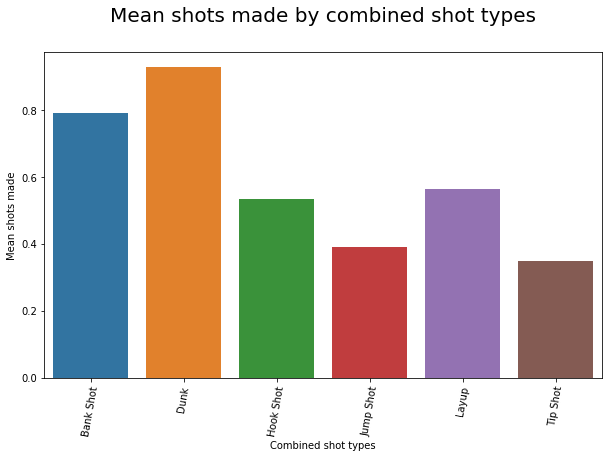

In [140]:
mean_made_by_combined_type = train.groupby("combined_shot_type")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_combined_type["combined_shot_type"], y = mean_made_by_combined_type["mean"])
plt.title("Mean shots made by combined shot types", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation = 80)
plt.xlabel("Combined shot types")
plt.ylabel("Mean shots made")
plt.show()

In [141]:
compare_means(train, "combined_shot_type", "Jump Shot")

Kobe Bryant made 39.11% of his shots if the combined_shot_type is Jump Shot.
Kobe Bryant made 62.75% of his shots if the combined_shot_type is not Jump Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [142]:
compare_means(train, "combined_shot_type", "Layup")

Kobe Bryant made 56.51% of his shots if the combined_shot_type is Layup.
Kobe Bryant made 42.07% of his shots if the combined_shot_type is not Layup.
There is a 0.0% chance that the difference in these means is a coincidence.


In [143]:
compare_means(train, "combined_shot_type", "Dunk")

Kobe Bryant made 92.8% of his shots if the combined_shot_type is Dunk.
Kobe Bryant made 42.55% of his shots if the combined_shot_type is not Dunk.
There is a 0.0% chance that the difference in these means is a coincidence.


In [144]:
compare_means(train, "combined_shot_type", "Tip Shot")

Kobe Bryant made 34.87% of his shots if the combined_shot_type is Tip Shot.
Kobe Bryant made 44.67% of his shots if the combined_shot_type is not Tip Shot.
There is a 1.77% chance that the difference in these means is a coincidence.


In [145]:
compare_means(train, "combined_shot_type", "Hook Shot")

Kobe Bryant made 53.54% of his shots if the combined_shot_type is Hook Shot.
Kobe Bryant made 44.57% of his shots if the combined_shot_type is not Hook Shot.
There is a 4.93% chance that the difference in these means is a coincidence.


In [146]:
compare_means(train, "combined_shot_type", "Bank Shot")

Kobe Bryant made 79.17% of his shots if the combined_shot_type is Bank Shot.
Kobe Bryant made 44.45% of his shots if the combined_shot_type is not Bank Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


### 3.3. Shots made by Game Event ID

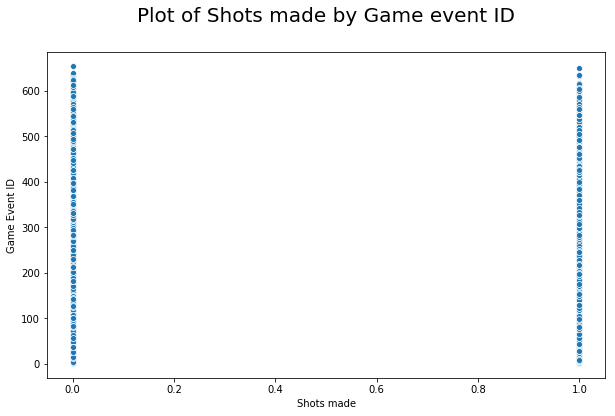

In [147]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.game_event_id)
plt.title("Plot of Shots made by Game event ID", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Game Event ID")
plt.show()

In [148]:
stats.pointbiserialr(train.shot_made_flag, train.game_event_id)

PointbiserialrResult(correlation=-0.03723159456305367, pvalue=2.3709407168504072e-09)

### 3.4. Shots made by Game ID

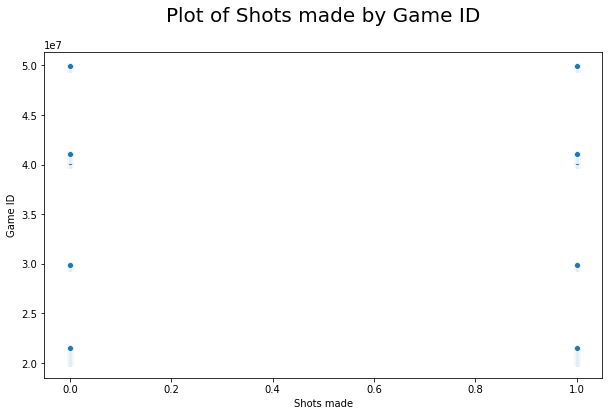

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.game_id)
plt.title("Plot of Shots made by Game ID", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Game ID")
plt.show()

In [150]:
stats.pointbiserialr(train.shot_made_flag, train.game_id)

PointbiserialrResult(correlation=-0.0016124525348274958, pvalue=0.7960455013183467)

### 3.5. Shots made by Latitude

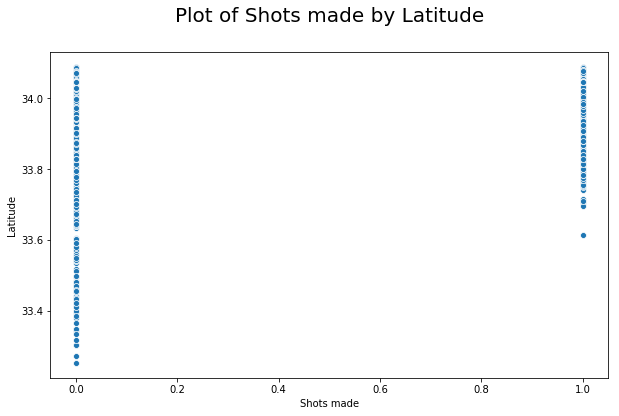

In [151]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.lat)
plt.title("Plot of Shots made by Latitude", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Latitude")
plt.show()

In [152]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.lat)

PointbiserialrResult(correlation=0.1480703524659651, pvalue=6.808797369949813e-126)

### 3.6. Shots made by X coordinate location

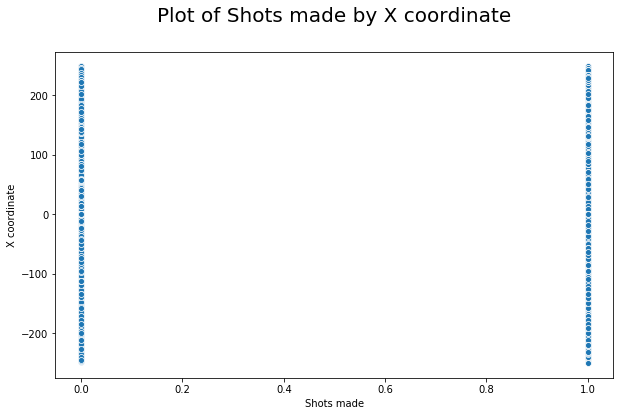

In [153]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.loc_x)
plt.title("Plot of Shots made by X coordinate", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("X coordinate")
plt.show()

In [154]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.loc_x)

PointbiserialrResult(correlation=-0.000847537195105287, pvalue=0.8919350933887209)

### 3.7. Shots made by Y coordinate location

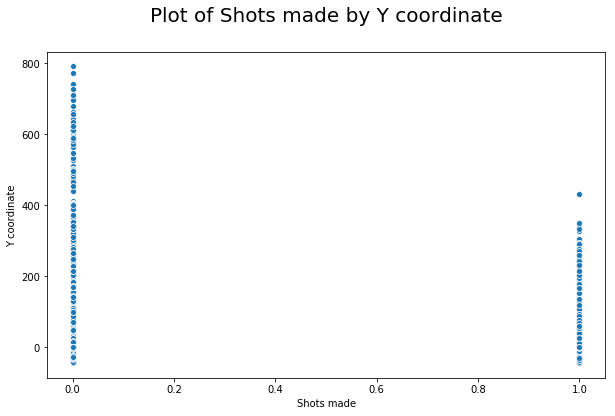

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.loc_y)
plt.title("Plot of Shots made by Y coordinate", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Y coordinate")
plt.show()

In [156]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.loc_y)

PointbiserialrResult(correlation=-0.1480703524659652, pvalue=6.808797369939751e-126)

### 3.8. Shots made by Longitude

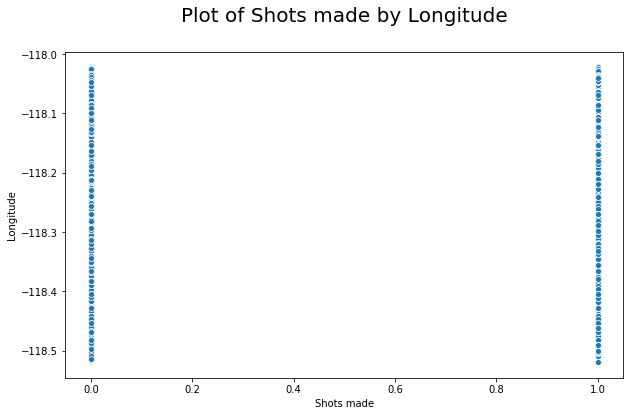

In [157]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.lon)
plt.title("Plot of Shots made by Longitude", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Longitude")
plt.show()

In [158]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.lon)

PointbiserialrResult(correlation=-0.0008475371951068865, pvalue=0.8919350933887209)

### 3.9. Shots by Minutes remaining

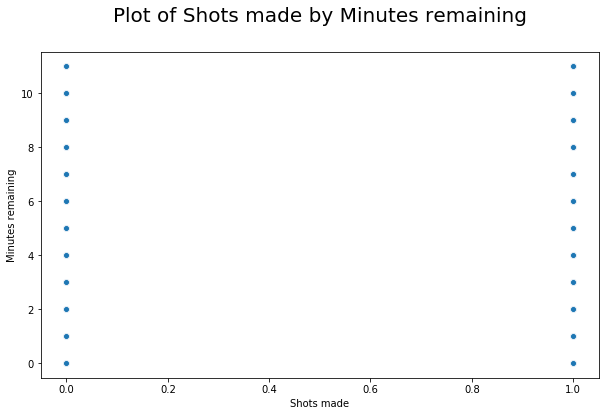

In [159]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.minutes_remaining)
plt.title("Plot of Shots made by Minutes remaining", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Minutes remaining")
plt.show()

In [160]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.minutes_remaining)

PointbiserialrResult(correlation=0.028341773809929267, pvalue=5.520753468225262e-06)

### 3.10. Shots made by Period

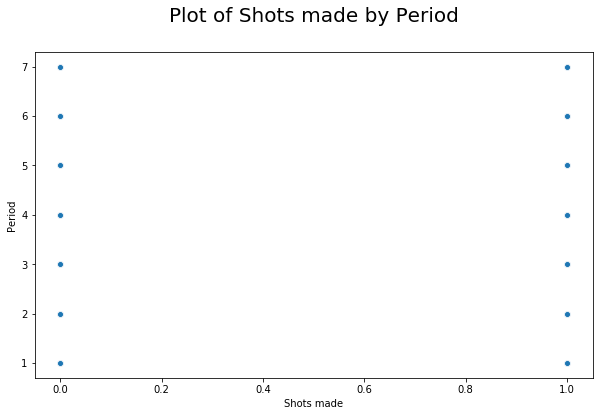

In [161]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.period)
plt.title("Plot of Shots made by Period", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Period")
plt.show()

In [162]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.period)

PointbiserialrResult(correlation=-0.03215239769574252, pvalue=2.5335681088004956e-07)

### 3.11. Shots made by Playoffs

In [163]:
def compare_playoff_mean(df):
    cat_average = df[df["playoffs"] == 1].shot_made_flag.mean()
    non_cat_average = df[df["playoffs"] != 1].shot_made_flag.mean()
    
    x = len(df[(df["playoffs"] == 1) & (df["shot_made_flag"] == 1)])
    n = len(df[df["playoffs"] == 1])
    p = df.shot_made_flag.mean()

    p_value = stats.binom_test(x = x, n = n, p = p)
    
    print("Kobe Bryant made " + str(round(cat_average*100,2)) + "% of his shots in the playoffs.")
    print("Kobe Bryant made " + str(round(non_cat_average*100,2)) + "% of his shots not in the playoffs")
    print("There is a " + str(round(p_value*100,2)) + "% chance that the difference in these means is a coincidence.")

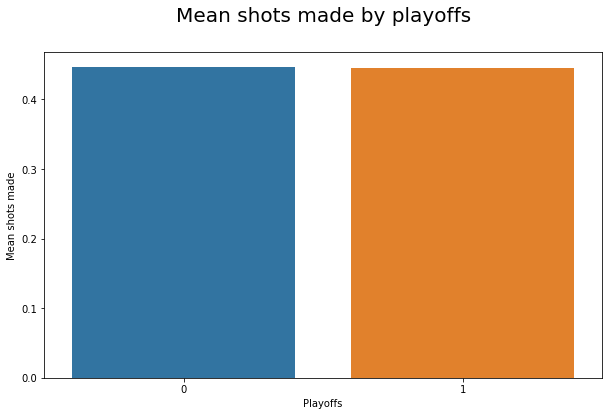

In [164]:
mean_made_by_playoffs = train.groupby("playoffs")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_playoffs["playoffs"], y = mean_made_by_playoffs["mean"])
plt.title("Mean shots made by playoffs", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Playoffs")
plt.ylabel("Mean shots made")
plt.show()

In [165]:
compare_means(train, "playoffs", 1) 

Kobe Bryant made 44.47% of his shots if the playoffs is 1.
Kobe Bryant made 44.64% of his shots if the playoffs is not 1.
There is a 85.68% chance that the difference in these means is a coincidence.


### 3.12. Shots made by Seconds remaining

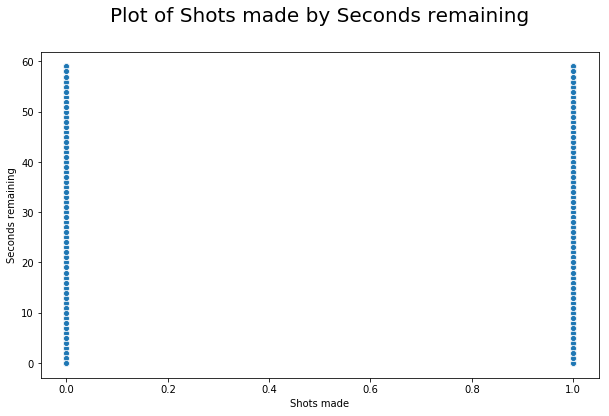

In [166]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.seconds_remaining)
plt.title("Plot of Shots made by Seconds remaining", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Seconds remaining")
plt.show()

In [167]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.seconds_remaining)

PointbiserialrResult(correlation=0.03080397371676776, pvalue=7.856603552270483e-07)

### 3.13. Shots made by Shot distance

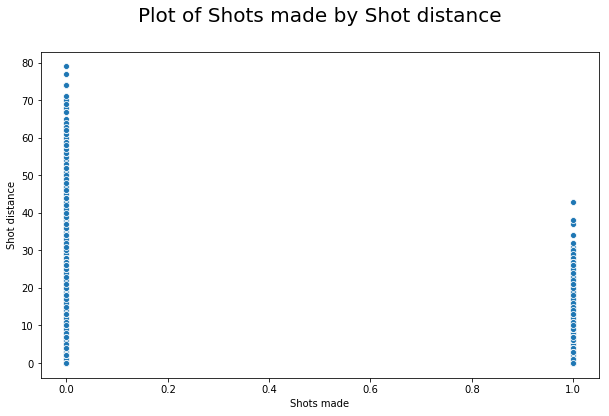

In [168]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.shot_distance)
plt.title("Plot of Shots made by Shot distance", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Shot distance")
plt.show()

In [169]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.shot_distance)

PointbiserialrResult(correlation=-0.19824178489401684, pvalue=4.979389702267751e-226)

### 3.14. Shots made by Shot type

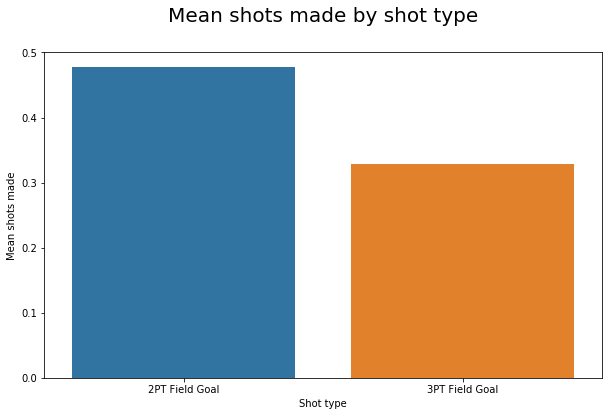

In [170]:
mean_made_by_shot_type = train.groupby("shot_type")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_shot_type["shot_type"], y = mean_made_by_shot_type["mean"])
plt.title("Mean shots made by shot type", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot type")
plt.ylabel("Mean shots made")
plt.show()

In [171]:
compare_means(train, "shot_type", "2PT Field Goal")

Kobe Bryant made 47.73% of his shots if the shot_type is 2PT Field Goal.
Kobe Bryant made 32.93% of his shots if the shot_type is not 2PT Field Goal.
There is a 0.0% chance that the difference in these means is a coincidence.


In [172]:
compare_means(train, "shot_type", "3PT Field Goal")

Kobe Bryant made 32.93% of his shots if the shot_type is 3PT Field Goal.
Kobe Bryant made 47.73% of his shots if the shot_type is not 3PT Field Goal.
There is a 0.0% chance that the difference in these means is a coincidence.


### 3.15. Shots made by Shot zone area

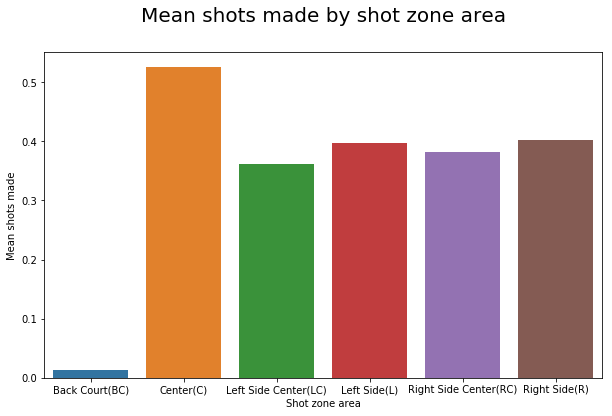

In [173]:
mean_made_by_shot_zone_area = train.groupby("shot_zone_area")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_shot_zone_area["shot_zone_area"], y = mean_made_by_shot_zone_area["mean"])
plt.title("Mean shots made by shot zone area", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot zone area")
plt.ylabel("Mean shots made")
plt.show()

In [174]:
compare_means(train, "shot_zone_area", "Back Court(BC)")

Kobe Bryant made 1.39% of his shots if the shot_zone_area is Back Court(BC).
Kobe Bryant made 44.74% of his shots if the shot_zone_area is not Back Court(BC).
There is a 0.0% chance that the difference in these means is a coincidence.


In [175]:
compare_means(train, "shot_zone_area", "Center(C)")

Kobe Bryant made 52.56% of his shots if the shot_zone_area is Center(C).
Kobe Bryant made 38.4% of his shots if the shot_zone_area is not Center(C).
There is a 0.0% chance that the difference in these means is a coincidence.


In [176]:
compare_means(train, "shot_zone_area", "Left Side Center(LC)")

Kobe Bryant made 36.12% of his shots if the shot_zone_area is Left Side Center(LC).
Kobe Bryant made 45.9% of his shots if the shot_zone_area is not Left Side Center(LC).
There is a 0.0% chance that the difference in these means is a coincidence.


In [177]:
compare_means(train, "shot_zone_area", "Left Side(L)")

Kobe Bryant made 39.69% of his shots if the shot_zone_area is Left Side(L).
Kobe Bryant made 45.3% of his shots if the shot_zone_area is not Left Side(L).
There is a 0.0% chance that the difference in these means is a coincidence.


In [178]:
compare_means(train, "shot_zone_area", "Right Side Center(RC)")

Kobe Bryant made 38.26% of his shots if the shot_zone_area is Right Side Center(RC).
Kobe Bryant made 45.78% of his shots if the shot_zone_area is not Right Side Center(RC).
There is a 0.0% chance that the difference in these means is a coincidence.


In [179]:
compare_means(train, "shot_zone_area", "Right Side(R)")

Kobe Bryant made 40.17% of his shots if the shot_zone_area is Right Side(R).
Kobe Bryant made 45.4% of his shots if the shot_zone_area is not Right Side(R).
There is a 0.0% chance that the difference in these means is a coincidence.


### 3.16. Shots made by Shot zone basic

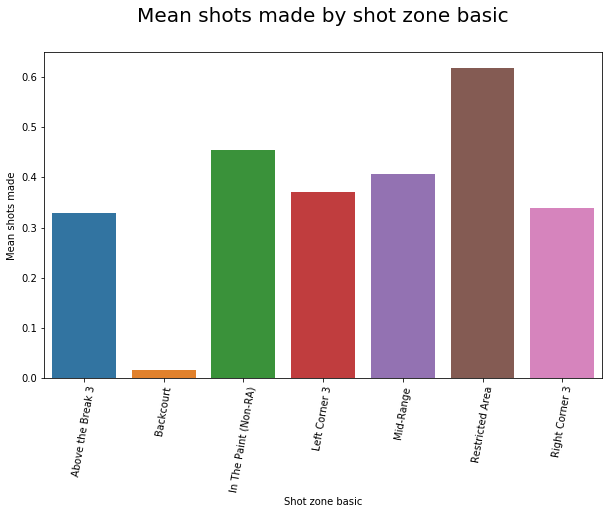

In [180]:
mean_made_by_shot_zone_basic = train.groupby("shot_zone_basic")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_shot_zone_basic["shot_zone_basic"], y = mean_made_by_shot_zone_basic["mean"])
plt.title("Mean shots made by shot zone basic", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Shot zone basic")
plt.ylabel("Mean shots made")
plt.show()

In [181]:
compare_means(train, "shot_zone_basic", "Above the Break 3")

Kobe Bryant made 32.92% of his shots if the shot_zone_basic is Above the Break 3.
Kobe Bryant made 47.25% of his shots if the shot_zone_basic is not Above the Break 3.
There is a 0.0% chance that the difference in these means is a coincidence.


In [182]:
compare_means(train, "shot_zone_basic", "Backcourt")

Kobe Bryant made 1.67% of his shots if the shot_zone_basic is Backcourt.
Kobe Bryant made 44.72% of his shots if the shot_zone_basic is not Backcourt.
There is a 0.0% chance that the difference in these means is a coincidence.


In [183]:
compare_means(train, "shot_zone_basic", "In The Paint (Non-RA)")

Kobe Bryant made 45.44% of his shots if the shot_zone_basic is In The Paint (Non-RA).
Kobe Bryant made 44.47% of his shots if the shot_zone_basic is not In The Paint (Non-RA).
There is a 30.9% chance that the difference in these means is a coincidence.


In [184]:
compare_means(train, "shot_zone_basic", "Left Corner 3")

Kobe Bryant made 37.08% of his shots if the shot_zone_basic is Left Corner 3.
Kobe Bryant made 44.69% of his shots if the shot_zone_basic is not Left Corner 3.
There is a 1.94% chance that the difference in these means is a coincidence.


In [185]:
compare_means(train, "shot_zone_basic", "Mid-Range")

Kobe Bryant made 40.63% of his shots if the shot_zone_basic is Mid-Range.
Kobe Bryant made 47.39% of his shots if the shot_zone_basic is not Mid-Range.
There is a 0.0% chance that the difference in these means is a coincidence.


In [186]:
compare_means(train, "shot_zone_basic", "Restricted Area")

Kobe Bryant made 61.8% of his shots if the shot_zone_basic is Restricted Area.
Kobe Bryant made 39.46% of his shots if the shot_zone_basic is not Restricted Area.
There is a 0.0% chance that the difference in these means is a coincidence.


In [187]:
compare_means(train, "shot_zone_basic", "Right Corner 3")

Kobe Bryant made 33.93% of his shots if the shot_zone_basic is Right Corner 3.
Kobe Bryant made 44.76% of his shots if the shot_zone_basic is not Right Corner 3.
There is a 0.01% chance that the difference in these means is a coincidence.


### 3.17. Shots made by Shot zone range

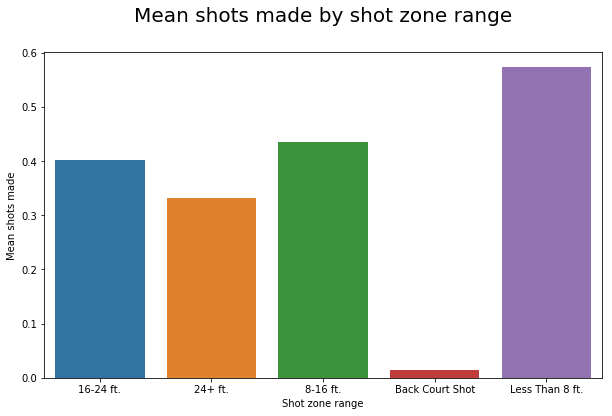

In [188]:
mean_made_by_shot_zone_range = train.groupby("shot_zone_range")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x = mean_made_by_shot_zone_range["shot_zone_range"], y = mean_made_by_shot_zone_range["mean"])
plt.title("Mean shots made by shot zone range", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shot zone range")
plt.ylabel("Mean shots made")
plt.show()

In [189]:
compare_means(train, "shot_zone_range", "16-24 ft.")

Kobe Bryant made 40.18% of his shots if the shot_zone_range is 16-24 ft..
Kobe Bryant made 46.25% of his shots if the shot_zone_range is not 16-24 ft..
There is a 0.0% chance that the difference in these means is a coincidence.


In [190]:
compare_means(train, "shot_zone_range", "24+ ft.")

Kobe Bryant made 33.25% of his shots if the shot_zone_range is 24+ ft..
Kobe Bryant made 47.56% of his shots if the shot_zone_range is not 24+ ft..
There is a 0.0% chance that the difference in these means is a coincidence.


In [191]:
compare_means(train, "shot_zone_range", "8-16 ft.")

Kobe Bryant made 43.55% of his shots if the shot_zone_range is 8-16 ft..
Kobe Bryant made 44.91% of his shots if the shot_zone_range is not 8-16 ft..
There is a 10.91% chance that the difference in these means is a coincidence.


In [192]:
compare_means(train, "shot_zone_range", "Back Court Shot")

Kobe Bryant made 1.39% of his shots if the shot_zone_range is Back Court Shot.
Kobe Bryant made 44.74% of his shots if the shot_zone_range is not Back Court Shot.
There is a 0.0% chance that the difference in these means is a coincidence.


In [193]:
compare_means(train, "shot_zone_range", "Less Than 8 ft.")

Kobe Bryant made 57.31% of his shots if the shot_zone_range is Less Than 8 ft..
Kobe Bryant made 39.02% of his shots if the shot_zone_range is not Less Than 8 ft..
There is a 0.0% chance that the difference in these means is a coincidence.


### 3.18. Shots made by Opponent

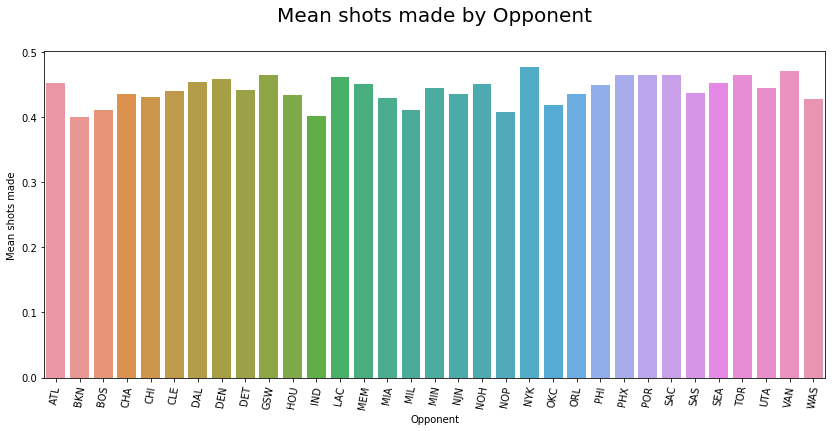

In [194]:
mean_made_by_opponent = train.groupby("opponent")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = mean_made_by_opponent["opponent"], y = mean_made_by_opponent["mean"])
plt.title("Mean shots made by Opponent", fontdict = {"fontsize":20}, pad=30.0)
plt.xticks(rotation=80)
plt.xlabel("Opponent")
plt.ylabel("Mean shots made")
plt.show()

In [195]:
compare_means(train, "opponent", "ATL")

Kobe Bryant made 45.21% of his shots if the opponent is ATL.
Kobe Bryant made 44.61% of his shots if the opponent is not ATL.
There is a 81.02% chance that the difference in these means is a coincidence.


In [196]:
compare_means(train, "opponent", "BKN")

Kobe Bryant made 40.0% of his shots if the opponent is BKN.
Kobe Bryant made 44.62% of his shots if the opponent is not BKN.
There is a 55.3% chance that the difference in these means is a coincidence.


In [197]:
compare_means(train, "opponent", "BOS")

Kobe Bryant made 41.12% of his shots if the opponent is BOS.
Kobe Bryant made 44.73% of his shots if the opponent is not BOS.
There is a 5.22% chance that the difference in these means is a coincidence.


In [198]:
compare_means(train, "opponent", "NYK")

Kobe Bryant made 47.7% of his shots if the opponent is NYK.
Kobe Bryant made 44.55% of his shots if the opponent is not NYK.
There is a 15.05% chance that the difference in these means is a coincidence.


In [199]:
compare_means(train, "opponent", "IND")

Kobe Bryant made 40.1% of his shots if the opponent is IND.
Kobe Bryant made 44.73% of his shots if the opponent is not IND.
There is a 2.43% chance that the difference in these means is a coincidence.


### 3.19. Shots made by Seconds in period

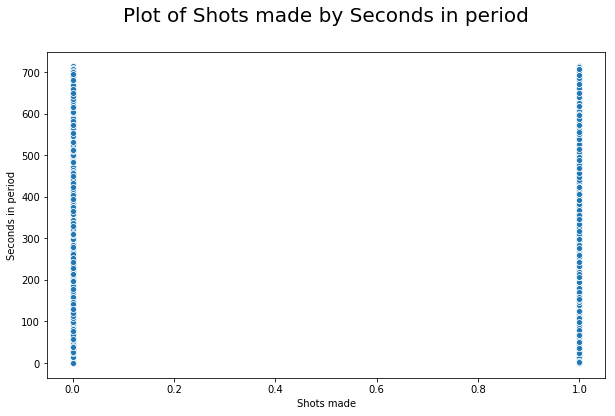

In [200]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.seconds_in_period)
plt.title("Plot of Shots made by Seconds in period", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Seconds in period")
plt.show()

In [201]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.seconds_in_period)

PointbiserialrResult(correlation=0.030774871916795538, pvalue=8.046841428233766e-07)

### 3.20. Shots made by Seconds in regulation

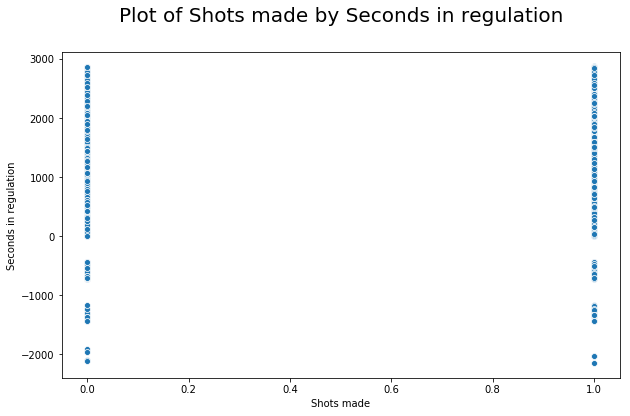

In [202]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.seconds_in_regulation)
plt.title("Plot of Shots made by Seconds in regulation", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Seconds in regulation")
plt.show()

In [203]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.seconds_in_regulation)

PointbiserialrResult(correlation=-0.023563274309917094, pvalue=0.0001583466436300327)

### 3.21. Shots made by Season

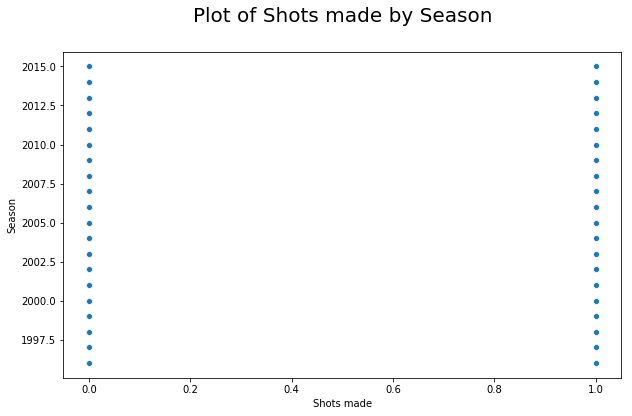

In [204]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.num_season)
plt.title("Plot of Shots made by Season", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Season")
plt.show()

In [205]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.num_season)

PointbiserialrResult(correlation=-0.01877690476916286, pvalue=0.002611530406827404)

### 3.22. Shots made by home vs away game

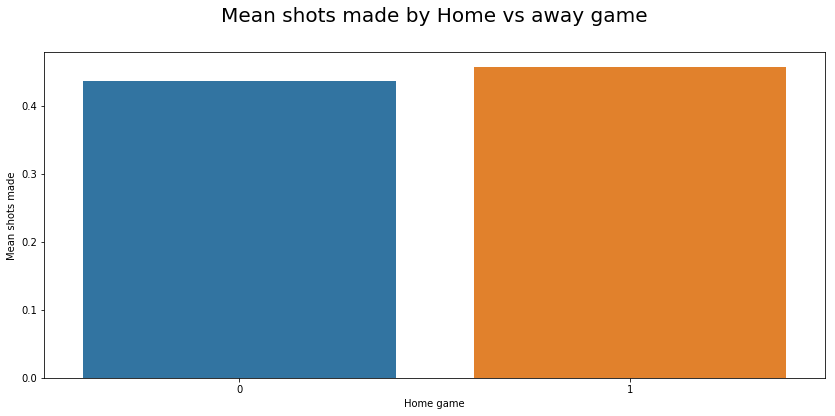

In [206]:
mean_made_by_home_game = train.groupby("home_game")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = mean_made_by_home_game["home_game"], y = mean_made_by_home_game["mean"])
plt.title("Mean shots made by Home vs away game", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Home game")
plt.ylabel("Mean shots made")
plt.show()

In [207]:
compare_means(train, "home_game", 0)

Kobe Bryant made 43.64% of his shots if the home_game is 0.
Kobe Bryant made 45.65% of his shots if the home_game is not 0.
There is a 2.45% chance that the difference in these means is a coincidence.


### 3.23. Shots made by Month

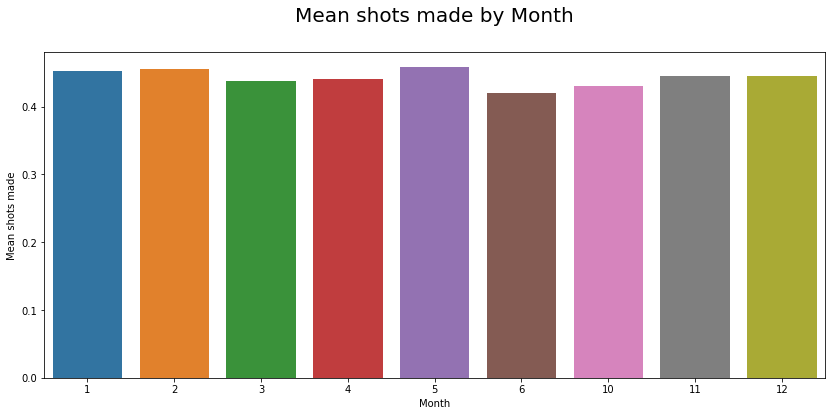

In [208]:
mean_made_by_month = train.groupby("month")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = mean_made_by_month["month"], y = mean_made_by_month["mean"])
plt.title("Mean shots made by Month", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Month")
plt.ylabel("Mean shots made")
plt.show()

In [209]:
compare_means(train, "month", 1)

Kobe Bryant made 45.3% of his shots if the month is 1.
Kobe Bryant made 44.49% of his shots if the month is not 1.
There is a 40.17% chance that the difference in these means is a coincidence.


In [210]:
compare_means(train, "month", 5)

Kobe Bryant made 45.83% of his shots if the month is 5.
Kobe Bryant made 44.51% of his shots if the month is not 5.
There is a 25.9% chance that the difference in these means is a coincidence.


In [211]:
compare_means(train, "month", 6)

Kobe Bryant made 41.96% of his shots if the month is 6.
Kobe Bryant made 44.69% of his shots if the month is not 6.
There is a 15.83% chance that the difference in these means is a coincidence.


### 3.24. Shots made by Day

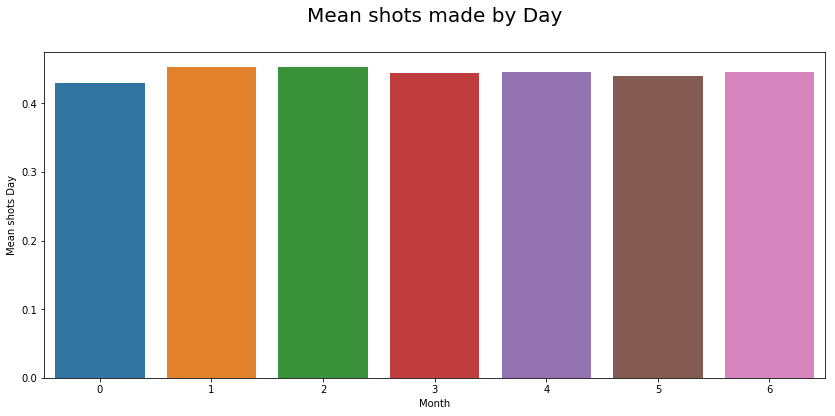

In [212]:
mean_made_by_day = train.groupby("day")["shot_made_flag"].agg(["sum","mean"]).reset_index()
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = mean_made_by_day["day"], y = mean_made_by_day["mean"])
plt.title("Mean shots made by Day", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Month")
plt.ylabel("Mean shots Day")
plt.show()

In [213]:
compare_means(train, "day", 0)

Kobe Bryant made 42.96% of his shots if the day is 0.
Kobe Bryant made 44.75% of his shots if the day is not 0.
There is a 15.14% chance that the difference in these means is a coincidence.


In [214]:
compare_means(train, "day", 1)

Kobe Bryant made 45.25% of his shots if the day is 1.
Kobe Bryant made 44.48% of his shots if the day is not 1.
There is a 39.3% chance that the difference in these means is a coincidence.


### 3.25. Shots made by Kobe Bryants age (days)

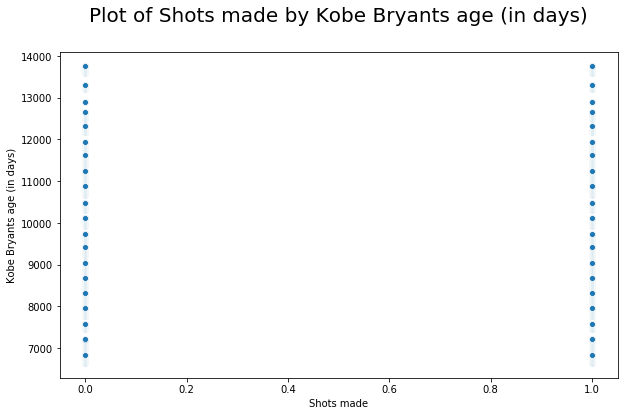

In [215]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.kb_age_days)
plt.title("Plot of Shots made by Kobe Bryants age (in days)", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Kobe Bryants age (in days)")
plt.show()

In [216]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.kb_age_days)

PointbiserialrResult(correlation=-0.018913633308275116, pvalue=0.002429128030262781)

### 3.26. Shots made by Kobe Bryants age (years)

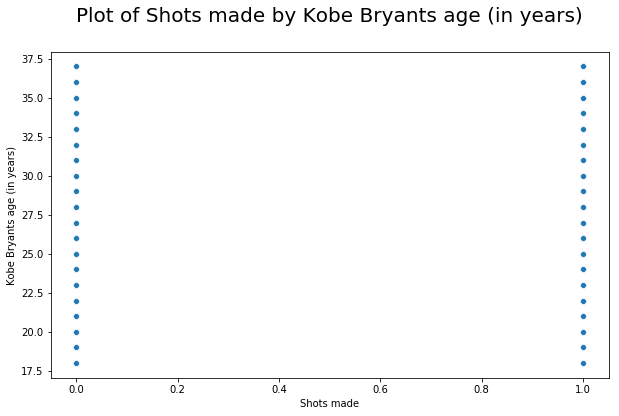

In [217]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.kb_age_years)
plt.title("Plot of Shots made by Kobe Bryants age (in years)", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Kobe Bryants age (in years)")
plt.show()

In [218]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.kb_age_years)

PointbiserialrResult(correlation=-0.018776904769162852, pvalue=0.002611530406827404)

### 3.27. Shots mabe by Days into the season

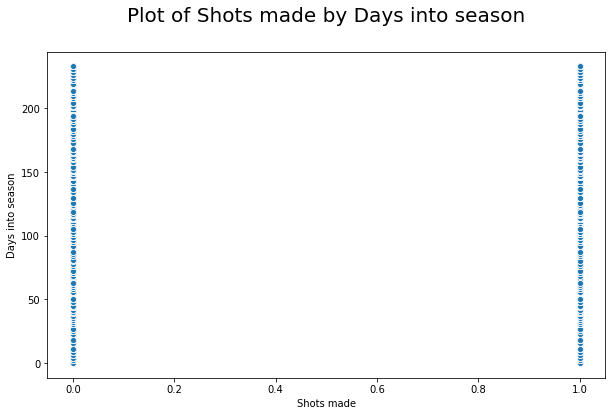

In [219]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x = train.shot_made_flag, y = train.days_into_season)
plt.title("Plot of Shots made by Days into season", fontdict = {"fontsize":20}, pad=30.0)
plt.xlabel("Shots made")
plt.ylabel("Days into season")
plt.show()

In [220]:
stats.pointbiserialr(x = train.shot_made_flag, y = train.days_into_season)

PointbiserialrResult(correlation=-0.007626540742313953, pvalue=0.22151314887184248)

## 4. Predicting shots made

In [221]:
## Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

### 4.1. Determining relevant features
Based on the bivariate analysis, the following features are determined as relevant:
* Action type (Some action types have a significant impact on the chance of a shot being made)
* Combined shot type (This variable summarizes the 'Action type' variable, so might be more useful)
* Game Event ID (Significant impact, but this variable does not contain very meaningful information, so could probably still be dropped.
* Latitude / Y coordinate / Shot distance (These features all represent the same data, so one of these should be picked (to avoid autocorrelation). The bivariate analysis shows that this should be an important predictor.)
* Period
* Shot Type (There might be some autocorrelation with the Latitude / Y coordiante / Shot distance variable)
* Shot zone area
* Shot zone basic (There might be some autocorrelation with Shot zone area)
* Shot zone range (There might be some autocorrelation with Latitude / Y coordiante / Shot distance)
* Seconds in period
* Kobe Bryants age (in days)

In [222]:
relevant_features = ["action_type","combined_shot_type","lat","loc_y","shot_distance","period","shot_type","shot_zone_area",
                    "shot_zone_basic","shot_zone_range","seconds_in_period","kb_age_days"]
data = train[relevant_features]

### 4.2. One-hot encoding categorical variables
The following categorical variables should be one-hot encoded:
* Combined shot type
* Shot type
* Shot zone area
* Shot zone basic
* Shot zone range

#### 4.2.1. One-Hot encoding Combined Shot Type

In [223]:
shot_types = np.asarray(data.combined_shot_type.value_counts().index)

In [224]:
shot_type_encoder = OneHotEncoder(categorical_features = shot_types)

In [225]:
err

NameError: name 'err' is not defined

In [ ]:
test = shot_type_encoder.fit_transform(data.combined_shot_type)

In [ ]:
cat_feats = ["action_type","combined_shot_type","shot_type","shot_zone_area","shot_zone_basic","shot_zonce_range"]

enc = OneHotEncoder(categorical_features = cat_feats)
data = enc.fit_transform(data)

In [ ]:
data

In [ ]:
data.head()